# Imports

In [1]:
import pandas as pd
import utils
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Constants + Helper Functions

In [2]:
CONJUNCTION_COLORS = {
    "and": "#be0aff",
    "or": "#580aff",
    "but": "#0043ce",
    "nor": "#d12c19"
}

LIKE_UNLIKE_COLORS = {
    "likes": "#008bf8",
    "unlikes": "#dc0073"
}

CATEGORY_COLORS = {
    "NP": "#ee1266",
    "VP": "#6a4c93",
    "ADJP": "#1982c4",
    "ADVP": "#0ead69",
    "PP": "#ff4b35",
    "SBAR": "#00cecb"
}

CONJUNCTIONS = ['and', 'or', 'but', 'nor']

In [3]:
def gen_df_from_path(path):
    '''
    Concatenate all CSV files in the specified path and return
    the result as a DataFrame.

    @param path (str): path to input CSV files
    @return (DataFrame): DataFrame containing all data
    '''
  
    all_files = glob.glob(path)

    # Concatenate all CSVs in the specified path into one dataframe
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

    if li == []:
        return None

    df = pd.concat(li, axis=0, ignore_index=True)
    return df

# GUM

In [4]:
# Load samples from GUM
gum_samples = gen_df_from_path('csv/GUM/*.csv')

# Get like coordinations
gum_likes = utils.likes_df(gum_samples)

# Finding closures over wordnet relations produces redundant search warnings
# We'll just filter these warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Get wordnet relations for like coordinations from GUM corpus
    gum_synonymy_df = utils.analyze_synonymy(gum_likes)
    gum_antonymy_df = utils.analyze_antonymy(gum_likes)
    gum_hypernymy_df = utils.analyze_hypernymy(gum_likes)
    gum_cohyponymy_df = utils.analyze_cohyponymy(gum_likes)
    gum_entailment_df = utils.analyze_entailment(gum_likes)

gum_synonyms = gum_synonymy_df[gum_synonymy_df['Synonyms?'] == True]
utils.pretty_print(gum_synonyms, 'rtf/gum_synonyms.rtf')

# Synonyms

In [5]:
def get_synonyms_freqs(df):
    # Get synonyms
    syns = df.loc[(df['Synonyms?'] == True)]

    # Get counts
    syns_count = len(syns)
    tot = len(df)

    print('syns:', syns_count)
    print('not syns:', tot - syns_count)

    return syns_count / tot

### By conjunction

In [6]:
def synonym_conjunction_distribution(synonyms_df, source, outfile):

    labels = []
    syns_freqs = []

    for conjunction in CONJUNCTIONS:
        print(conjunction)

        labels.append(conjunction)

        df = synonyms_df.copy()
        df = df.loc[df['Conjunction'] == conjunction]

        if df is None:
            continue

        syns_freqs.append(get_synonyms_freqs(df))

    x = np.arange(len(labels))  # the label locations
    width = 0.6  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, syns_freqs, width, color=CONJUNCTION_COLORS.values())

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage')
    ax.set_title(
        'Percentages of Coordinations with Synonymy\nby Conjunction (' + source + ')')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -12),
                    textcoords="offset points",
                    ha='center', va='bottom', color='white')

    plt.savefig(outfile, bbox_inches='tight')


and
syns: 64
not syns: 2236
or
syns: 11
not syns: 321
but
syns: 7
not syns: 214
nor
syns: 1
not syns: 7


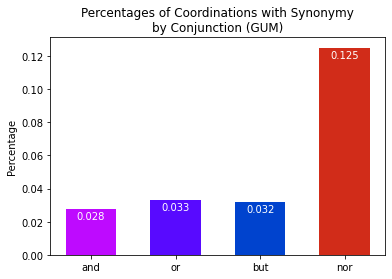

In [7]:
synonym_conjunction_distribution(gum_synonymy_df, 'GUM', 'charts/GUM_synonymy_by_conjunction.pdf')

### By category

In [8]:
def synonym_category_distribution(synonyms_df, source, outfile):
    labels = []
    syns_freqs = []

    nouns, verbs, adjps, advps = utils.likes_by_category(synonyms_df)

    print('Nominal')
    labels.append('Nominal')

    syns_freqs.append(get_synonyms_freqs(nouns))

    print('Verbal')
    labels.append('Verbal')

    syns_freqs.append(get_synonyms_freqs(verbs))

    print('Adjectival')
    labels.append('Adjectival')

    syns_freqs.append(get_synonyms_freqs(adjps))

    print('Adverbial')
    labels.append('Adverbial')

    syns_freqs.append(get_synonyms_freqs(advps))

    x = np.arange(len(labels))  # the label locations
    width = 0.6  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, syns_freqs, width, color=CATEGORY_COLORS.values())

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage')
    ax.set_title('Percentages of Coordinations with Synonymy\nby Syntactic Category (' + source + ')')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -12),
                    textcoords="offset points",
                    ha='center', va='bottom', color='white')

    plt.savefig(outfile, bbox_inches='tight')

Nominal
syns: 17
not syns: 1136
Verbal
syns: 59
not syns: 1320
Adjectival
syns: 6
not syns: 265
Adverbial
syns: 1
not syns: 57


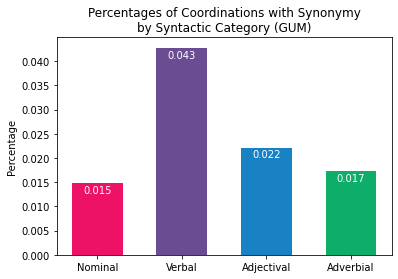

In [9]:
synonym_category_distribution(gum_synonymy_df, 'GUM', 'charts/GUM_synonymy_by_category.pdf')